In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Posting Date'>

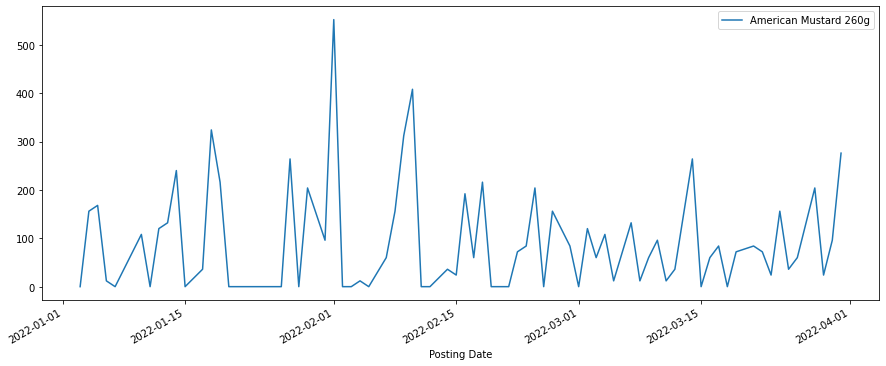

In [2]:
df=pd.read_excel('sales.xlsx')
sumdf=df.groupby(["Description",'Posting Date'])["QTY"].sum()
df1 = pd.DataFrame(sumdf)
df2 = pd.pivot_table(df1, values ='QTY', index =['Description'],
                         columns =['Posting Date'], aggfunc = np.sum)
df3= df2.fillna(0, inplace=True)
df3=df2.T

# Filter for SKU -  American Mustard 260g
df_am=df3['American Mustard 260g']
df_am=pd.DataFrame(df_am)
df_am.plot()

#passed other tests and defined - ADF, PACF, ACF ; p,d,q

/home/senarkit/miniconda3/envs/pydev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/senarkit/miniconda3/envs/pydev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37956D+00    |proj g|=  3.16889D-01

At iterate    5    f=  5.30999D+00    |proj g|=  9.65426D-02

At iterate   10    f=  5.28535D+00    |proj g|=  9.00913D-02

At iterate   15    f=  5.24544D+00    |proj g|=  1.32173D-02

At iterate   20    f=  5.23167D+00    |proj g|=  2.11646D-02

At iterate   25    f=  5.23019D+00    |proj g|=  5.32152D-03

At iterate   30    f=  5.19717D+00    |proj g|=  6.91061D-02

At iterate   35    f=  5.18487D+00    |proj g|=  4.73985D-03

At iterate   40    f=  5.18484D+00    |proj g|=  2.98957D-04

At iterate   45    f=  5.18478D+00    |proj g|=  5.58418D-04

At iterate   50    f=  5.18476D+00    |proj g|=  1.08256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/senarkit/miniconda3/envs/pydev/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


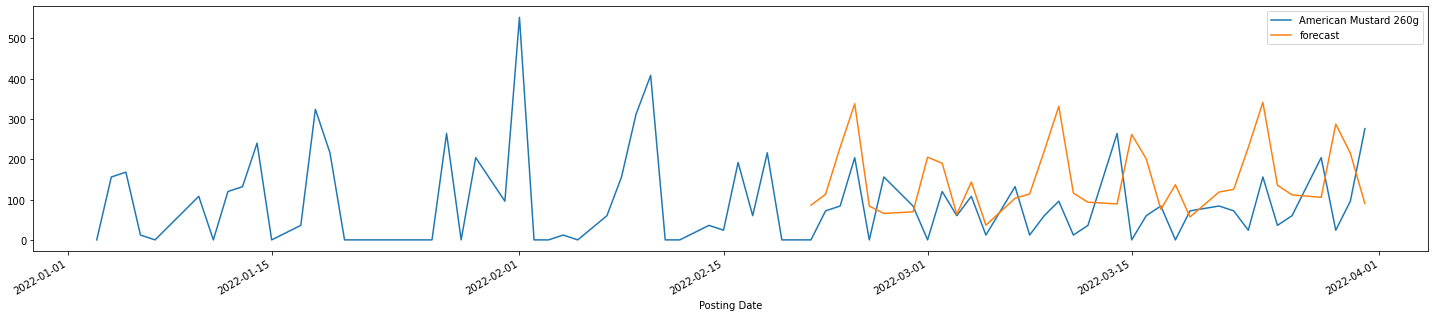

In [3]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_am['American Mustard 260g'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

df_am['forecast']=results.predict(start='2022-02-21',end ='2022-3-31',dynamic=True)
df_am[['American Mustard 260g','forecast']].plot(figsize=(25,5))
plt.show()

/home/senarkit/miniconda3/envs/pydev/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


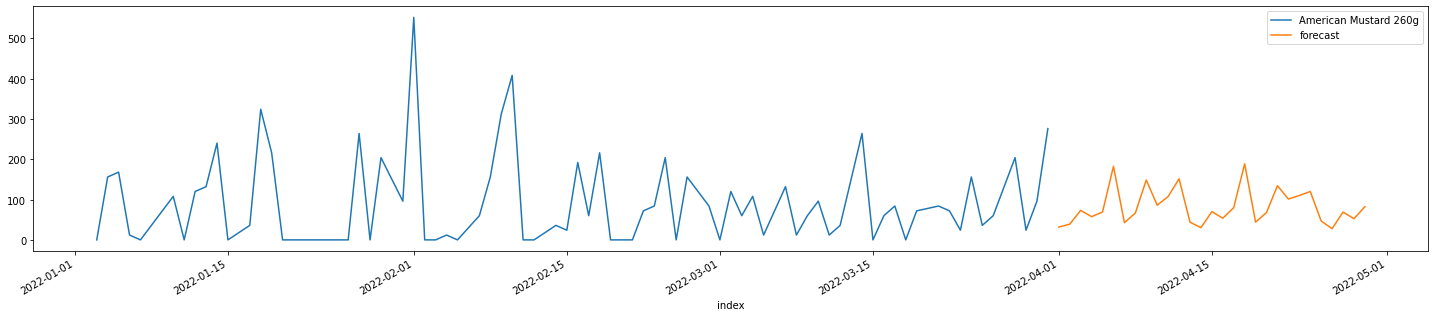

In [4]:
# Add future dates
from pandas.tseries.offsets import DateOffset
future_dates=[df_am.index[-1]+ DateOffset(days=x)for x in range(0,30)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_am.columns)
future_df=pd.concat([df_am,future_datest_df])

# Forecasts
future_df = future_df.reset_index()
future_df["forecast"] = results.forecast(steps=1000)

# Plot
future_df = future_df.set_index("index")
future_df[['American Mustard 260g', 'forecast']].plot(figsize=(25, 5)) 
plt.show()